<a href="https://colab.research.google.com/github/TejeswarReddy2000/-Numerical-Programming-in-Python---Web-Scraping/blob/main/Numerical_Programming_in_Python_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [ ]:
Movie_url  =[]
movies_link = soup.find_all("a",class_="title-list-grid__item--link")
for link in movies_link:
    movie_url = "https://www.justwatch.com"+link["href"]
    Movie_url.append(movie_url)

In [ ]:
Movie_url

['https://www.justwatch.com/in/movie/laapataa-ladies',
 'https://www.justwatch.com/in/movie/aavesham-2024',
 'https://www.justwatch.com/in/movie/manjummel-boys',
 'https://www.justwatch.com/in/movie/family-star',
 'https://www.justwatch.com/in/movie/black-magic-2024',
 'https://www.justwatch.com/in/movie/the-crew-2024',
 'https://www.justwatch.com/in/movie/madgaon-express',
 'https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire',
 'https://www.justwatch.com/in/movie/yodha-2022',
 'https://www.justwatch.com/in/movie/premalu',
 'https://www.justwatch.com/in/movie/dune-part-two',
 'https://www.justwatch.com/in/movie/kung-fu-panda-4',
 'https://www.justwatch.com/in/movie/article-370',
 'https://www.justwatch.com/in/movie/oppenheimer',
 'https://www.justwatch.com/in/movie/hereditary',
 'https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film',
 'https://www.justwatch.com/in/movie/tillu-square',
 'https://www.justwatch.com/in/movie/hanu-man',
 'https://www.jus

## **Scrapping Movie Title**

In [ ]:
# Write Your Code here
Movie_Title =[]

for url in Movie_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")

  try:
    title_block = soup.find("div",class_="title-block")
    title = title_block.h1.text
  except Exception as e:
    title = 'Not Available'
  Movie_Title.append(title)

In [ ]:
Movie_Title

[' Laapataa Ladies ',
 ' Aavesham ',
 ' Manjummel Boys ',
 ' Family Star ',
 ' Shaitaan ',
 ' Crew ',
 ' Madgaon Express ',
 ' Godzilla x Kong: The New Empire ',
 ' Yodha ',
 ' Premalu ',
 ' Dune: Part Two ',
 ' Kung Fu Panda 4 ',
 ' Article 370 ',
 ' Oppenheimer ',
 ' Hereditary ',
 ' Teri Baaton Mein Aisa Uljha Jiya ',
 ' Tillu Square ',
 ' Hanu-Man ',
 ' Godzilla Minus One ',
 ' The Idea of You ',
 ' Anyone But You ',
 ' Monkey Man ',
 ' Zara Hatke Zara Bachke ',
 ' The Beekeeper ',
 ' Dune ',
 ' Mad Max: Fury Road ',
 ' 12th Fail ',
 ' Salaar ',
 ' Animal ',
 ' The Fall Guy ',
 ' Madame Web ',
 ' Rise of the Planet of the Apes ',
 ' 777 Charlie ',
 ' Aquaman and the Lost Kingdom ',
 ' Amar Singh Chamkila ',
 'Not Available',
 'Not Available',
 'Not Available',
 'Not Available',
 'Not Available',
 'Not Available',
 'Not Available',
 'Not Available',
 'Not Available',
 'Not Available',
 'Not Available',
 'Not Available',
 'Not Available',
 'Not Available',
 'Not Available',
 'Not Ava

## **Scrapping release Year**

In [ ]:
# Write Your Code here
Release_year =[]

for url in Movie_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")

  try:
    year = soup.find("div",class_="title-block")
    release_year = year.span.text.strip("( )")
  except Exception as e:
    release_year = 'NaN'
  Release_year.append(release_year)

In [ ]:
Release_year

## **Scrapping Genres**

In [ ]:
# Write Your Code here
Genre =[]
for url in Movie_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")

  try:
    Genre_types = soup.find('h3', class_='detail-infos__subheading', string='Genres')
    Genre_value = Genre_types.find_next_sibling('div', class_='detail-infos__value').text.strip()
  except Exception as e:
    Genre_value = 'NA'
  Genre.append(Genre_value)


In [ ]:

Genre

## **Scrapping IMBD Rating**

In [ ]:
# Write Your Code here
Imdb_Rating =[]
for url in Movie_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")

  try:
    Imdb = soup.find_all("div",class_="jw-scoring-listing__rating")[1].span
    Imdb1= Imdb.text[1:4]
  except Exception as e:
    Imdb1 = "NA"
  Imdb_Rating.append(Imdb1)

In [ ]:
Imdb_Rating

## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here
Runtime =[]
for url in Movie_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")
  try:
    Runtime_indicator = soup.find('h3', class_='detail-infos__subheading', string='Runtime')
    Movie_runtime = Runtime_indicator.find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    Movie_runtime ='NA'
  Runtime.append(Movie_runtime)

In [ ]:

Runtime

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here
Age_Rating=[]
for url in Movie_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")
  try:
    rating = soup.find('h3', class_='detail-infos__subheading', string='Age rating')
    age_ratings = rating.find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    age_ratings = "Not Available"
  Age_Rating.append(age_ratings)


In [ ]:
Age_Rating

## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here
Country_origin =[]
for url in Movie_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")
  try:
    country = soup.find('h3', class_='detail-infos__subheading', string=' Production country ')
    country_details = country.find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    country_details = 'NA'
  Country_origin.append(country_details)


In [ ]:
Country_origin

## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
Streaming_Provider =[]
for url in Movie_url:
  response = requests.get(url)
  try:
    soup = BeautifulSoup(response.text,"html.parser")
    Stream_provider = soup.find("div",class_='buybox-row stream').find_all("img",class_='offer__icon')
    alt_values = [img['alt'] for img in Stream_provider]
    alt_values = ",".join(alt_values)

  except AttributeError as err:
    alt_values = 'NA'
  Streaming_Provider.append(alt_values)


In [ ]:
Streaming_Provider

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here
movie_data = {
                'Title': Movie_Title,
                'Release year': Release_year,
                'Genre': Genre,
                'IMDB Rating': Imdb_Rating,
                'Runtime': Runtime,
                'Age rating': Age_Rating,
                'Production country': Country_origin,
                'Streaming service': Streaming_Provider,
                'URL': Movie_url
              }

In [ ]:
# Creating a DataFrame using the dictionary
JustWatch_Movies_df = pd.DataFrame(movie_data)

In [ ]:
#head of dataframe
JustWatch_Movies_df.head(10)

,Title,Release year,Genre,IMDB Rating,Runtime,Age rating,Production country,Streaming service,URL
0,Laapataa Ladies,2024,"Drama, Comedy",8.5,2h 2min,UA,India,Netflix,https://www.justwatch.com/in/movie/laapataa-la...
1,Manjummel Boys,2024,"Mystery & Thriller, Drama, Action & Adventure",8.4,2h 15min,UA,India,Hotstar,https://www.justwatch.com/in/movie/manjummel-boys
2,Aavesham,2024,"Action & Adventure, Comedy",8.0,2h 38min,Not Available,India,Amazon Prime Video,https://www.justwatch.com/in/movie/aavesham-2024
3,Family Star,2024,"Action & Adventure, Drama, Romance",5.1,NA,Not Available,India,Amazon Prime Video,https://www.justwatch.com/in/movie/family-star
4,Shaitaan,2024,"Horror, Mystery & Thriller, Drama",6.7,NA,UA,India,Netflix,https://www.justwatch.com/in/movie/black-magic...
5,Madgaon Express,2024,"Comedy, Drama",7.3,NA,UA,NA,Amazon Prime Video,https://www.justwatch.com/in/movie/madgaon-exp...
6,Godzilla x Kong: The New Empire,2024,"Fantasy, Science-Fiction, Mystery & Thriller, ...",6.3,NA,UA,NA,NA,https://www.justwatch.com/in/movie/godzilla-x-...
7,Not Available,2024,,NA,NA,Not Available,NA,Netflix,https://www.justwatch.com/in/movie/article-370
8,Not Available,2024,"Mystery & Thriller, Drama, Action & Adventure",NA,NA,Not Available,NA,Amazon Prime Video,https://www.justwatch.com/in/movie/yodha-2022
9,Not Available,2024,"Comedy, Drama",NA,NA,Not Available,NA,NA,https://www.justwatch.com/in/movie/the-crew-2024


In [ ]:
# Adding a new column 'Type' to the DataFrame with constant value 'Movie'
JustWatch_Movies_df['Type'] = 'Movie'

In [ ]:


#head of dataframe
JustWatch_Movies_df.head(10)

,Title,Release year,Genre,IMDB Rating,Runtime,Age rating,Production country,Streaming service,URL,Type
0,Laapataa Ladies,2024,"Drama, Comedy",8.5,2h 2min,UA,India,Netflix,https://www.justwatch.com/in/movie/laapataa-la...,Movie
1,Manjummel Boys,2024,"Mystery & Thriller, Drama, Action & Adventure",8.4,2h 15min,UA,India,Hotstar,https://www.justwatch.com/in/movie/manjummel-boys,Movie
2,Aavesham,2024,"Action & Adventure, Comedy",8.0,2h 38min,Not Available,India,Amazon Prime Video,https://www.justwatch.com/in/movie/aavesham-2024,Movie
3,Family Star,2024,"Action & Adventure, Drama, Romance",5.1,NA,Not Available,India,Amazon Prime Video,https://www.justwatch.com/in/movie/family-star,Movie
4,Shaitaan,2024,"Horror, Mystery & Thriller, Drama",6.7,NA,UA,India,Netflix,https://www.justwatch.com/in/movie/black-magic...,Movie
5,Madgaon Express,2024,"Comedy, Drama",7.3,NA,UA,NA,Amazon Prime Video,https://www.justwatch.com/in/movie/madgaon-exp...,Movie
6,Godzilla x Kong: The New Empire,2024,"Fantasy, Science-Fiction, Mystery & Thriller, ...",6.3,NA,UA,NA,NA,https://www.justwatch.com/in/movie/godzilla-x-...,Movie
7,Not Available,2024,,NA,NA,Not Available,NA,Netflix,https://www.justwatch.com/in/movie/article-370,Movie
8,Not Available,2024,"Mystery & Thriller, Drama, Action & Adventure",NA,NA,Not Available,NA,Amazon Prime Video,https://www.justwatch.com/in/movie/yodha-2022,Movie
9,Not Available,2024,"Comedy, Drama",NA,NA,Not Available,NA,NA,https://www.justwatch.com/in/movie/the-crew-2024,Movie


In [ ]:
#shape of data
count = JustWatch_Movies_df.shape


print("No of columns:", count[1])
print("No of rows:", count[0])
print("No of columns: 10")
print("No of rows: 100")
#info of data
JustWatch_Movies_df.info()

No of columns: 10
No of rows: 100
No of columns: 10
No of rows: 100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               100 non-null    object
 1   Release year        100 non-null    object
 2   Genre               100 non-null    object
 3   IMDB Rating         100 non-null    object
 4   Runtime             100 non-null    object
 5   Age rating          100 non-null    object
 6   Production country  100 non-null    object
 7   Streaming service   100 non-null    object
 8   URL                 100 non-null    object
 9   Type                100 non-null    object
dtypes: object(10)
memory usage: 7.9+ KB


In [ ]:
# Replace 'NA' with NaN (Not a Number)
JustWatch_Movies_df['IMDB Rating'].replace('NA', float('nan'), inplace=True)

# Convert the 'IMDB_Rating' column to float
JustWatch_Movies_df['IMDB Rating'] = JustWatch_Movies_df['IMDB Rating'].astype(float)


In [ ]:

JustWatch_Movies_df

,Title,Release year,Genre,IMDB Rating,Runtime,Age rating,Production country,Streaming service,URL,Type
0,Laapataa Ladies,2024,"Drama, Comedy",8.5,2h 2min,UA,India,Netflix,https://www.justwatch.com/in/movie/laapataa-la...,Movie
1,Manjummel Boys,2024,"Mystery & Thriller, Drama, Action & Adventure",8.4,2h 15min,UA,India,Hotstar,https://www.justwatch.com/in/movie/manjummel-boys,Movie
2,Aavesham,2024,"Action & Adventure, Comedy",8.0,2h 38min,Not Available,India,Amazon Prime Video,https://www.justwatch.com/in/movie/aavesham-2024,Movie
3,Family Star,2024,"Action & Adventure, Drama, Romance",5.1,NA,Not Available,India,Amazon Prime Video,https://www.justwatch.com/in/movie/family-star,Movie
4,Shaitaan,2024,"Horror, Mystery & Thriller, Drama",6.7,NA,UA,India,Netflix,https://www.justwatch.com/in/movie/black-magic...,Movie
...,...,...,...,...,...,...,...,...,...,...
95,Not Available,2022,NA,NaN,NA,Not Available,NA,NA,https://www.justwatch.com/in/movie/hridayam,Movie
96,Not Available,NaN,NA,NaN,NA,Not Available,NA,NA,https://www.justwatch.com/in/movie/silence-2-t...,Movie
97,Not Available,NaN,"Mystery & Thriller, Crime, Drama, Action & Adv...",NaN,NA,Not Available,NA,NA,https://www.justwatch.com/in/movie/k-g-f-chapt...,Movie
98,Not Available,NaN,NA,NaN,NA,Not Available,NA,NA,https://www.justwatch.com/in/movie/akelli,Movie


## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here


# Initializing an empty list to store the tvshow URLs
TV_Shows_url = []

link = soup.find_all('a', class_='title-list-grid__item--link')
for shows_link in link:
  url = "https://www.justwatch.com"+shows_link['href']
  TV_Shows_url.append(url)


TV_Shows_url


['https://www.justwatch.com/in/tv-show/heeramandi',
 'https://www.justwatch.com/in/tv-show/panchayat',
 'https://www.justwatch.com/in/tv-show/shogun-2024',
 'https://www.justwatch.com/in/tv-show/mirzapur',
 'https://www.justwatch.com/in/tv-show/fallout',
 'https://www.justwatch.com/in/tv-show/game-of-thrones',
 'https://www.justwatch.com/in/tv-show/dead-boy-detectives',
 'https://www.justwatch.com/in/tv-show/3-body-problem',
 'https://www.justwatch.com/in/tv-show/murder-in-mahim',
 'https://www.justwatch.com/in/tv-show/young-sheldon',
 'https://www.justwatch.com/in/tv-show/baby-reindeer',
 'https://www.justwatch.com/in/tv-show/apharan',
 'https://www.justwatch.com/in/tv-show/attack-on-titan',
 'https://www.justwatch.com/in/tv-show/bridgerton',
 'https://www.justwatch.com/in/tv-show/sunflower-2021',
 'https://www.justwatch.com/in/tv-show/maxton-hall-the-world-between-us',
 'https://www.justwatch.com/in/tv-show/aashram',
 'https://www.justwatch.com/in/tv-show/dil-dosti-dilemma',
 'https:

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here
# Initializing an empty list to store TV show titles
TV_show_title = []

for url in TV_Shows_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")

  try:
    title = soup.find("div",class_="title-block").h1.text
  except Exception as e:
    title = 'Not Available'
  TV_show_title.append(title)




In [ ]:

TV_show_title

## **Fetching Release Year**

In [ ]:
# Write Your Code here

Release_year_ =[]

for url in TV_Shows_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")

  try:
    year = soup.find("div",class_="title-block")
    release_year = year.span.text.strip("( )")
  except Exception as e:
    release_year = 'NaN'
  Release_year_.append(release_year)


In [ ]:
Release_year_

## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
Genre_ =[]

for url in Movie_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")
  try:
    Genre_indi1 = soup.find('h3', class_='detail-infos__subheading', string='Genres').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    Genre_indi1 ='NA'

  Genre_.append(Genre_indi1)



In [ ]:

Genre_

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
Imdb_Rating_ =[]

for url in TV_Shows_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")

  try:
    Imdb = soup.find_all("div",class_="jw-scoring-listing__rating")[1].span
    Imdb1= Imdb.text[1:4]
  except Exception as e:
    Imdb1 = "NA"
  Imdb_Rating_.append(Imdb1)


In [ ]:

Imdb_Rating_

## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
Age_Rating_=[]

for url in Movie_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")

  try:
    rating1 = soup.find('h3', class_='detail-infos__subheading', string='Age rating').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    rating1 ='Not Available'
  Age_Rating_.append(rating1)


In [ ]:
Age_Rating_

## **Fetching Production Country details**

In [ ]:
# Write Your Code here
Country_origin_ =[]

for url in Movie_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")

  try:
    country1 = soup.find('h3', class_='detail-infos__subheading', string=' Production country ').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    country1 ='NA'
  Country_origin_.append(country1)


In [ ]:
Country_origin_

## **Fetching Streaming Service details**

In [ ]:

# Write Your Code here
Streaming_Provider_ =[]

for url in TV_Shows_url:
  response = requests.get(url)
  try:
    soup = BeautifulSoup(response.text,"html.parser")
    Stream_provider = soup.find("div",class_='buybox-row stream').find_all("img",class_='offer__icon')
    alt_values1 = [img['alt'] for img in Stream_provider]
    alt_values1 = ",".join(alt_values1)

  except AttributeError as err:
    alt_values1 = "NaN"
  Streaming_Provider_.append(alt_values1)



In [ ]:
Streaming_Provider_

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
# Write Your Code here
Runtime_ =[]

for url in TV_Shows_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")
  try:
    Runtime_indi1 = soup.find('h3', class_='detail-infos__subheading', string='Runtime').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    Runtime_indi1 ='NA'

  Runtime_.append(Runtime_indi1)


In [ ]:
Runtime_

## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here

# Creating a dictionary with keys as column names and values as lists
tvshow_data={'Title':TV_show_title,
            'Release year':Release_year,
            'Genre':Genre_,
            'IMDB Rating':Imdb_Rating_,
            'Runtime':Runtime_,
            'Age rating':Age_Rating_,
            'Production country':Country_origin_,
            'Streaming service':Streaming_Provider_,
            'URL':TV_Shows_url
              }
# Creating a DataFrame using the dictionary
TV_Show_df=pd.DataFrame(tvshow_data)


#head of Tv show dataframe
TV_Show_df.head(10)


,Title,Release year,Genre,IMDB Rating,Runtime,Age rating,Production country,Streaming service,URL
0,Heeramandi: The Diamond Bazaar,2024,,6.5,55min,UA,India,Netflix,https://www.justwatch.com/in/tv-show/heeramandi
1,Not Available,2024,"Mystery & Thriller, Drama, Action & Adventure",8.9,33min,UA,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/panchayat
2,Not Available,2024,"Action & Adventure, Comedy",8.8,59min,Not Available,India,Hotstar,https://www.justwatch.com/in/tv-show/shogun-2024
3,Not Available,2024,"Action & Adventure, Drama, Romance",8.5,50min,Not Available,NA,NaN,https://www.justwatch.com/in/tv-show/mirzapur
4,Not Available,2024,"Horror, Mystery & Thriller, Drama",8.5,59min,UA,NA,NaN,https://www.justwatch.com/in/tv-show/fallout
5,Not Available,2024,"Comedy, Drama",9.2,NA,UA,NA,NaN,https://www.justwatch.com/in/tv-show/game-of-t...
6,Not Available,2024,"Fantasy, Science-Fiction, Mystery & Thriller, ...",7.6,NA,UA,NA,NaN,https://www.justwatch.com/in/tv-show/dead-boy-...
7,Not Available,2024,"Action & Adventure, Drama, Mystery & Thriller",7.5,NA,Not Available,NA,NaN,https://www.justwatch.com/in/tv-show/3-body-pr...
8,Not Available,2024,"Mystery & Thriller, Drama, Action & Adventure",7.6,NA,UA,"United States, India",NaN,https://www.justwatch.com/in/tv-show/murder-in...
9,Not Available,2024,"Comedy, Drama",7.7,NA,UA,NA,NaN,https://www.justwatch.com/in/tv-show/young-she...


In [ ]:


# Adding a new column 'Type' to the DataFrame with constant value 'Tv Show'
TV_Show_df['Type']='Tv Show'


#shape of data
count = TV_Show_df.shape
rows, columns = count
print("No of rows:", rows)
print("No of columns:", columns)

#tv show data info
TV_Show_df.info()

No of rows: 100
No of columns: 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               100 non-null    object
 1   Release year        100 non-null    object
 2   Genre               100 non-null    object
 3   IMDB Rating         100 non-null    object
 4   Runtime             100 non-null    object
 5   Age rating          100 non-null    object
 6   Production country  100 non-null    object
 7   Streaming service   100 non-null    object
 8   URL                 100 non-null    object
 9   Type                100 non-null    object
dtypes: object(10)
memory usage: 7.9+ KB


In [ ]:
# Replace 'NA' with NaN (Not a Number)
TV_Show_df['IMDB Rating'].replace('NA',float('nan'),inplace=True)

# Convert the 'IMDB_Rating' column to float
TV_Show_df['IMDB Rating'] = TV_Show_df['IMDB Rating'].astype(float)


TV_Show_df.head()

,Title,Release year,Genre,IMDB Rating,Runtime,Age rating,Production country,Streaming service,URL,Type
0,Heeramandi: The Diamond Bazaar,2024,,6.5,55min,UA,India,Netflix,https://www.justwatch.com/in/tv-show/heeramandi,Tv Show
1,Not Available,2024,"Mystery & Thriller, Drama, Action & Adventure",8.9,33min,UA,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/panchayat,Tv Show
2,Not Available,2024,"Action & Adventure, Comedy",8.8,59min,Not Available,India,Hotstar,https://www.justwatch.com/in/tv-show/shogun-2024,Tv Show
3,Not Available,2024,"Action & Adventure, Drama, Romance",8.5,50min,Not Available,NA,NaN,https://www.justwatch.com/in/tv-show/mirzapur,Tv Show
4,Not Available,2024,"Horror, Mystery & Thriller, Drama",8.5,59min,UA,NA,NaN,https://www.justwatch.com/in/tv-show/fallout,Tv Show


In [ ]:
# Combining both movie_df and tvshow_df into single DataFrame
JustWatch_df=pd.concat([JustWatch_Movies_df,TV_Show_df],ignore_index=True)


#head of final DataFrame
JustWatch_df.head(10)


,Title,Release year,Genre,IMDB Rating,Runtime,Age rating,Production country,Streaming service,URL,Type
0,Laapataa Ladies,2024,"Drama, Comedy",8.5,2h 2min,UA,India,Netflix,https://www.justwatch.com/in/movie/laapataa-la...,Movie
1,Manjummel Boys,2024,"Mystery & Thriller, Drama, Action & Adventure",8.4,2h 15min,UA,India,Hotstar,https://www.justwatch.com/in/movie/manjummel-boys,Movie
2,Aavesham,2024,"Action & Adventure, Comedy",8.0,2h 38min,Not Available,India,Amazon Prime Video,https://www.justwatch.com/in/movie/aavesham-2024,Movie
3,Family Star,2024,"Action & Adventure, Drama, Romance",5.1,NA,Not Available,India,Amazon Prime Video,https://www.justwatch.com/in/movie/family-star,Movie
4,Shaitaan,2024,"Horror, Mystery & Thriller, Drama",6.7,NA,UA,India,Netflix,https://www.justwatch.com/in/movie/black-magic...,Movie
5,Madgaon Express,2024,"Comedy, Drama",7.3,NA,UA,NA,Amazon Prime Video,https://www.justwatch.com/in/movie/madgaon-exp...,Movie
6,Godzilla x Kong: The New Empire,2024,"Fantasy, Science-Fiction, Mystery & Thriller, ...",6.3,NA,UA,NA,NA,https://www.justwatch.com/in/movie/godzilla-x-...,Movie
7,Not Available,2024,,NaN,NA,Not Available,NA,Netflix,https://www.justwatch.com/in/movie/article-370,Movie
8,Not Available,2024,"Mystery & Thriller, Drama, Action & Adventure",NaN,NA,Not Available,NA,Amazon Prime Video,https://www.justwatch.com/in/movie/yodha-2022,Movie
9,Not Available,2024,"Comedy, Drama",NaN,NA,Not Available,NA,NA,https://www.justwatch.com/in/movie/the-crew-2024,Movie


In [ ]:


#tail of Final DataFrame
JustWatch_df.tail(10)

,Title,Release year,Genre,IMDB Rating,Runtime,Age rating,Production country,Streaming service,URL,Type
190,Not Available,NaN,NA,NaN,NA,Not Available,NA,NaN,https://www.justwatch.com/in/tv-show/genius,Tv Show
191,Not Available,NaN,NA,NaN,NA,Not Available,NA,NaN,https://www.justwatch.com/in/tv-show/wednesday,Tv Show
192,Not Available,NaN,NA,NaN,NA,Not Available,NA,NaN,https://www.justwatch.com/in/tv-show/better-ca...,Tv Show
193,Not Available,NaN,NA,NaN,NA,Not Available,NA,NaN,https://www.justwatch.com/in/tv-show/shrimad-r...,Tv Show
194,Not Available,NaN,NA,NaN,NA,UA,NA,NaN,https://www.justwatch.com/in/tv-show/spartacus,Tv Show
195,Not Available,2022,NA,NaN,NA,Not Available,NA,NaN,https://www.justwatch.com/in/tv-show/lootere,Tv Show
196,Not Available,NaN,NA,NaN,NA,Not Available,NA,NaN,https://www.justwatch.com/in/tv-show/you,Tv Show
197,Not Available,NaN,NA,NaN,NA,Not Available,India,NaN,https://www.justwatch.com/in/tv-show/white-collar,Tv Show
198,Not Available,NaN,NA,NaN,NA,Not Available,NA,NaN,https://www.justwatch.com/in/tv-show/kaiju-no-8,Tv Show
199,Not Available,NaN,NA,NaN,NA,Not Available,NA,NaN,https://www.justwatch.com/in/tv-show/under-the...,Tv Show


In [ ]:


#final df shape
row, columns = JustWatch_df.shape

print("No of rows:", row)
print("No of columns:", columns)


No of rows: 200
No of columns: 10


In [ ]:

#final DataFrame info
JustWatch_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               200 non-null    object 
 1   Release year        200 non-null    object 
 2   Genre               200 non-null    object 
 3   IMDB Rating         22 non-null     float64
 4   Runtime             200 non-null    object 
 5   Age rating          200 non-null    object 
 6   Production country  200 non-null    object 
 7   Streaming service   200 non-null    object 
 8   URL                 200 non-null    object 
 9   Type                200 non-null    object 
dtypes: float64(1), object(9)
memory usage: 15.8+ KB


## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Write Your Code here
## For Movies and TV shows release and start date between the Release year
start_date = '2005'
end_date = '2024'
min_rating = 7.0
JustWatch_df = JustWatch_df[(JustWatch_df["Release year"] >= start_date) & (JustWatch_df["Release year"] <= end_date) & (JustWatch_df["IMDB Rating"] >= min_rating)]


JustWatch_df

,Title,Release year,Genre,IMDB Rating,Runtime,Age rating,Production country,Streaming service,URL,Type
0,Laapataa Ladies,2024,"Drama, Comedy",8.5,2h 2min,UA,India,Netflix,https://www.justwatch.com/in/movie/laapataa-la...,Movie
1,Manjummel Boys,2024,"Mystery & Thriller, Drama, Action & Adventure",8.4,2h 15min,UA,India,Hotstar,https://www.justwatch.com/in/movie/manjummel-boys,Movie
2,Aavesham,2024,"Action & Adventure, Comedy",8.0,2h 38min,Not Available,India,Amazon Prime Video,https://www.justwatch.com/in/movie/aavesham-2024,Movie
5,Madgaon Express,2024,"Comedy, Drama",7.3,NA,UA,NA,Amazon Prime Video,https://www.justwatch.com/in/movie/madgaon-exp...,Movie
101,Not Available,2024,"Mystery & Thriller, Drama, Action & Adventure",8.9,33min,UA,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/panchayat,Tv Show
102,Not Available,2024,"Action & Adventure, Comedy",8.8,59min,Not Available,India,Hotstar,https://www.justwatch.com/in/tv-show/shogun-2024,Tv Show
103,Not Available,2024,"Action & Adventure, Drama, Romance",8.5,50min,Not Available,NA,NaN,https://www.justwatch.com/in/tv-show/mirzapur,Tv Show
104,Not Available,2024,"Horror, Mystery & Thriller, Drama",8.5,59min,UA,NA,NaN,https://www.justwatch.com/in/tv-show/fallout,Tv Show
105,Not Available,2024,"Comedy, Drama",9.2,NA,UA,NA,NaN,https://www.justwatch.com/in/tv-show/game-of-t...,Tv Show
106,Not Available,2024,"Fantasy, Science-Fiction, Mystery & Thriller, ...",7.6,NA,UA,NA,NaN,https://www.justwatch.com/in/tv-show/dead-boy-...,Tv Show


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Write Your Code here
#determining average ratings for both movie and tv shows
print("Mean IMDb Ratings:")
JustWatch_df.groupby('Type').agg({'IMDB Rating':'mean'})




Mean IMDb Ratings:


,IMDB Rating
Type,
Movie,8.05
Tv Show,8.22


## **Analyzing Top Genres**

In [ ]:
# Write Your Code here


## for Movies
Genre_count = JustWatch_df['Genre'].value_counts().sort_values(ascending=False)
Top_5_genres_visulalize = Genre_count.head(5)
Top_5_genres = Genre_count.head(5).index.tolist()


In [ ]:

Top_5_genres

['Mystery & Thriller, Drama, Action & Adventure',
 'Comedy, Drama',
 'Action & Adventure, Comedy',
 'Drama, Comedy',
 'Action & Adventure, Drama, Romance']

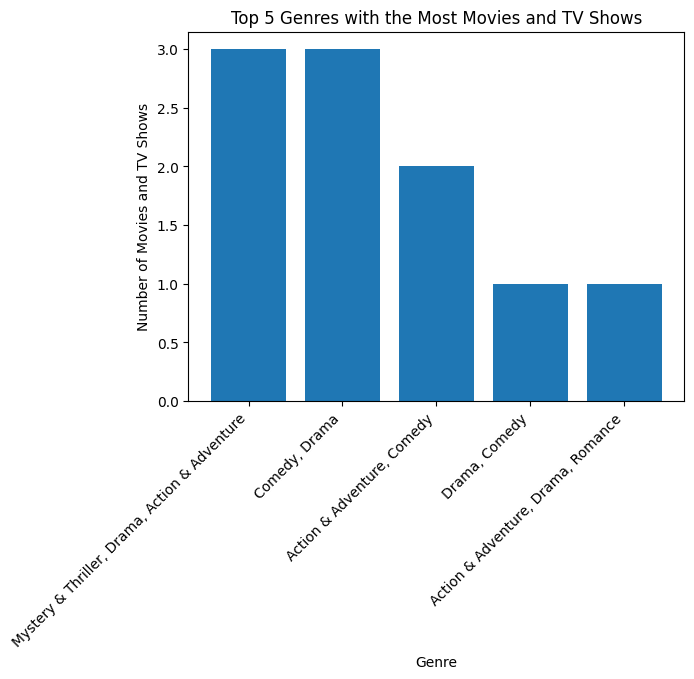

In [ ]:
#Let's Visvalize it using word cloud


##Lets Visualize
import matplotlib.pyplot as plt
plt.bar(x =Top_5_genres_visulalize.index,height =Top_5_genres_visulalize.values)
plt.xlabel('Genre')
plt.ylabel('Number of Movies and TV Shows')
plt.title('Top 5 Genres with the Most Movies and TV Shows')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:

!pip install wordcloud

In [ ]:


from wordcloud import WordCloud
import matplotlib.pyplot as plt

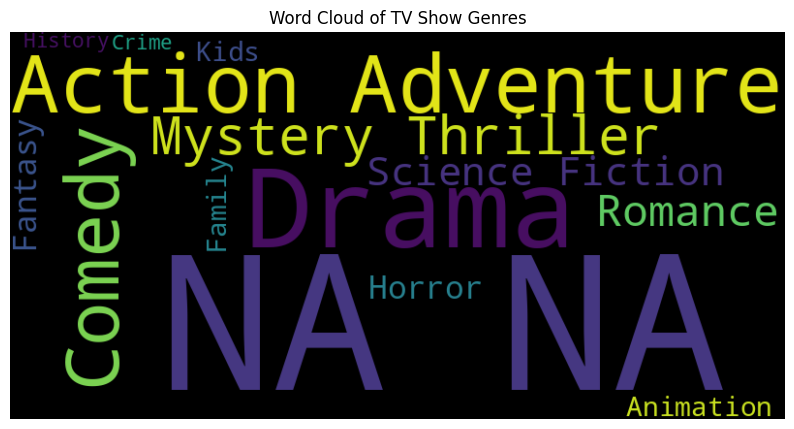

In [ ]:
#Showing Top Genres in TV show using Word Cloud

# Extracting genres and joining them into a single string
all_genres_text = ', '.join(TV_Show_df['Genre'].fillna('').values)

# Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='Black').generate(all_genres_text)

# Displaying the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of TV Show Genres')
plt.show()

## **Finding Predominant Streaming Service**

In [ ]:
# Write Your Code here

##Counting Streaming Service
Streaming_service_counts = JustWatch_df['Streaming service'].value_counts().sort_values(ascending = False)


## Streaming Services name with their count
Streaming_service_counts


Streaming service
NaN                   7
Amazon Prime Video    3
Netflix               2
Hotstar               2
Name: count, dtype: int64

## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format

#saving final dataframe as Final Data in csv format
JustWatch_df.to_csv('JustWatch Final Data.csv',index=False)

In [ ]:
#saving filter data as Filter Data in csv format


# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***